# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [2]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [4]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


Vemos dimensiones del dataset

In [5]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

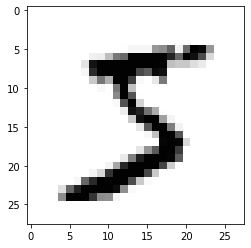

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [8]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [9]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [11]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [12]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [13]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [14]:
print(model.layers[1])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [15]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[ 0.04224601, -0.04112708,  0.05579391, ...,  0.06133074,
         0.05307524,  0.03402819],
       [ 0.00458369, -0.07089281,  0.00555674, ...,  0.0644208 ,
        -0.0381432 ,  0.05389315],
       [ 0.03606911,  0.0168808 ,  0.028202  , ..., -0.03868832,
         0.01061114, -0.07124996],
       ...,
       [ 0.01500341,  0.01781882, -0.00643267, ..., -0.03814724,
        -0.03432642,  0.07410382],
       [-0.02309362, -0.04619186,  0.0173158 , ..., -0.03397021,
        -0.04583364,  0.00290044],
       [-0.01631471, -0.06644006,  0.04508161, ...,  0.01971742,
        -0.04804078,  0.0367131 ]], dtype=float32)

In [17]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [18]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [19]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [20]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [21]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/15
782/782 [==============================] - 2s 2ms/step - loss: 0.8784 - accuracy: 0.7878 - val_loss: 0.3992 - val_accuracy: 0.8911
Epoch 2/15
782/782 [==============================] - 1s 2ms/step - loss: 0.3763 - accuracy: 0.8955 - val_loss: 0.3054 - val_accuracy: 0.9130
Epoch 3/15
782/782 [==============================] - 1s 2ms/step - loss: 0.3119 - accuracy: 0.9116 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 4/15
782/782 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.9210 - val_loss: 0.2422 - val_accuracy: 0.9306
Epoch 5/15
782/782 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9285 - val_loss: 0.2266 - val_accuracy: 0.9362
Epoch 6/15
782/782 [==============================] - 1s 2ms/step - loss: 0.2315 - accuracy: 0.9338 - val_loss: 0.2105 - val_accuracy: 0.9407
Epoch 7/15
782/782 [==============================] - 1s 2ms/step - loss: 0.2152 - accuracy: 0.9396 - val_loss: 0.1970 - val_accuracy: 0.9445
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [22]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 5,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1291 - accuracy: 0.9633 - val_loss: 0.1367 - val_accuracy: 0.9624
Epoch 2/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1231 - accuracy: 0.9647 - val_loss: 0.1313 - val_accuracy: 0.9642
Epoch 3/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1174 - accuracy: 0.9671 - val_loss: 0.1275 - val_accuracy: 0.9654
Epoch 4/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9681 - val_loss: 0.1222 - val_accuracy: 0.9666
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9699 - val_loss: 0.1204 - val_accuracy: 0.9667


Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [23]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.8784434199333191,
  0.37626710534095764,
  0.3119203448295593,
  0.27670031785964966,
  0.25199660658836365,
  0.23151598870754242,
  0.21521151065826416,
  0.20056451857089996,
  0.1881815642118454,
  0.17726099491119385,
  0.16713833808898926,
  0.15868905186653137,
  0.1500735878944397,
  0.14242208003997803,
  0.13554257154464722],
 'accuracy': [0.7877799868583679,
  0.8955000042915344,
  0.9115999937057495,
  0.9210399985313416,
  0.9284800291061401,
  0.9338399767875671,
  0.9395999908447266,
  0.9434800148010254,
  0.9473000168800354,
  0.9499199986457825,
  0.9524999856948853,
  0.9549800157546997,
  0.9578800201416016,
  0.9590200185775757,
  0.9615600109100342],
 'val_loss': [0.39924898743629456,
  0.30537810921669006,
  0.2804163992404938,
  0.2422080636024475,
  0.2266242951154709,
  0.21047693490982056,
  0.1970452219247818,
  0.18595698475837708,
  0.18081244826316833,
  0.16872818768024445,
  0.16194485127925873,
  0.1534786820411682,
  0.15076833963394165,
 

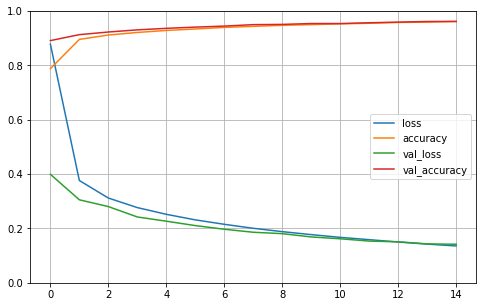

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [25]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 0s 942us/step - loss: 0.1198 - accuracy: 0.9639


[0.11978831887245178, 0.9639000296592712]

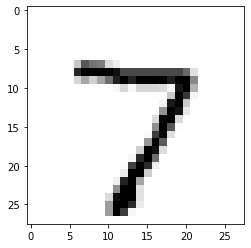

In [26]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [27]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.996, 0.   ,
        0.   ]], dtype=float32)

In [28]:
predictions.argmax()

7

In [44]:
model.predict(X_test).argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [30]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [31]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8149 - val_loss: 0.5781
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5614 - val_loss: 0.5030
Epoch 3/20
363/363 [==============================] - 0s 860us/step - loss: 0.5293 - val_loss: 0.4697
Epoch 4/20
363/363 [==============================] - 0s 879us/step - loss: 0.4770 - val_loss: 0.4536
Epoch 5/20
363/363 [==============================] - 0s 876us/step - loss: 0.4767 - val_loss: 0.4439
Epoch 6/20
363/363 [==============================] - 0s 913us/step - loss: 0.4603 - val_loss: 0.4547
Epoch 7/20
363/363 [==============================] - 0s 902us/step - loss: 0.5351 - val_loss: 0.4256
Epoch 8/20
363/363 [==============================] - 0s 841us/step - loss: 0.4522 - val_loss: 0.4233
Epoch 9/20
363/363 [==============================] - 0s 910us/step - loss: 0.4278 - val_loss: 0.4188
Epoch 10/20
363/363 [==============================] - 0s 952us/step - loss: 0.4223 - 

In [35]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 650us/step - loss: 0.3815
0.3815145492553711


In [36]:
y_pred = model.predict(X_test[:5])
y_pred

array([[2.4129925 ],
       [1.2485974 ],
       [1.2617433 ],
       [1.6697638 ],
       [0.78474534]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [37]:
model.save("my_keras_model.h5")

In [38]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 694us/step - loss: 0.3836
Epoch 2/10
363/363 [==============================] - 0s 697us/step - loss: 0.3827
Epoch 3/10
363/363 [==============================] - 0s 704us/step - loss: 0.3796
Epoch 4/10
363/363 [==============================] - 0s 698us/step - loss: 0.4410
Epoch 5/10
363/363 [==============================] - 0s 694us/step - loss: 0.3768
Epoch 6/10
363/363 [==============================] - 0s 706us/step - loss: 0.3817
Epoch 7/10
363/363 [==============================] - 0s 649us/step - loss: 0.3712
Epoch 8/10
363/363 [==============================] - 0s 641us/step - loss: 0.3716
Epoch 9/10
363/363 [==============================] - 0s 698us/step - loss: 0.3672
Epoch 10/10
363/363 [==============================] - 0s 703us/step - loss: 0.3644


### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [40]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=100,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3641 - val_loss: 0.3604
Epoch 2/100
363/363 [==============================] - 0s 868us/step - loss: 0.3613 - val_loss: 0.3493
Epoch 3/100
363/363 [==============================] - 0s 913us/step - loss: 0.3594 - val_loss: 0.3499
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.3448
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3571 - val_loss: 0.3506
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3560 - val_loss: 0.3497
Epoch 7/100
363/363 [==============================] - 0s 950us/step - loss: 0.3546 - val_loss: 0.3483
Epoch 8/100
363/363 [==============================] - 0s 899us/step - loss: 0.3523 - val_loss: 0.3422
Epoch 9/100
363/363 [==============================] - 0s 866us/step - loss: 0.3533 - val_loss: 0.3417
Epoch 10/100
363/363 [==============================] - 0s 892us/step - loss: 0.3